<a href="https://colab.research.google.com/github/MEnisSen/Experiments-on-Gradient-Descent/blob/main/Gradient_Descent_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

**Perform the following experiments in Problem 2 and Problem 3 for N = 5, 10, 15**

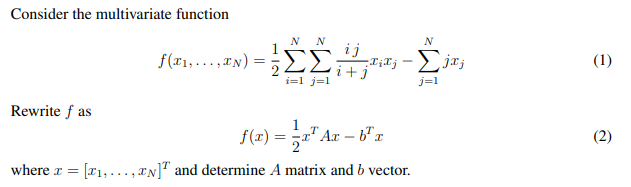

In [ ]:
def lossFunc(A, x, b):
  return 1/2 * (x.T.dot(A.dot(x))) - b.T.dot(x)

def lossDerivative(A, x, b):
  return A.dot(x) - b

# **Problem 2**

The minimum of f in (2) using the Gradient Descent algorithm,
1. taking the learning rate s = 0.01.
2. taking the learning rate at the first iteration as s0 = 0.1 and following the back-tracking
approach.
3. using the momentum method.
4. using the Nesterov technique.

In [ ]:
def problem2_1(A, x, b, max_iter = 1000, learning_rate = .01):
  loss = []
  for _ in range(max_iter):
    x -= learning_rate * lossDerivative(A, x, b)
    loss.append(lossFunc(A, x, b)[0,0])
  return (x, loss)

def problem2_2(A, x, b, max_iter = 1000, learning_rate = .1):
  loss = []
  for i in range(max_iter):
    x -= (learning_rate/(2**i)) * lossDerivative(A, x, b)
    loss.append(lossFunc(A, x, b)[0,0])
  return (x, loss)

def problem2_3(A, x, b, momentum = .01, max_iter = 1000, learning_rate = .1):
  loss = []
  z_old = lossDerivative(A, x, b)
  x -= learning_rate * z_old
  loss.append(lossFunc(A, x, b))
  for _ in range(max_iter-1):
    z_new = lossDerivative(A, x, b) + momentum * z_old
    x -= learning_rate * z_new
    z_old = z_new
    loss.append(lossFunc(A, x, b)[0,0])
  return (x, loss)

def problem2_4(A, x, b, momentum = .01, max_iter = 1000, learning_rate = .1):
  loss = []
  v = np.zeros(x.shape)
  for i in range(max_iter):
      x_prev = x
      v_prev = v
      v = momentum * v_prev + (1 - momentum) * lossDerivative(A, x, b)
      x = x_prev - learning_rate * v
      x = (1 + momentum) * x - momentum * x_prev
      loss.append(lossFunc(A, x, b)[0,0])
  return (x, loss)

/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
<ipython-input-31-1cccd1d405bf>:2: RuntimeWarning: invalid value encountered in subtract
  return 1/2 * (x.T.dot(A.dot(x))) - b.T.dot(x)
<ipython-input-27-f537bbe430b0>:33: RuntimeWarning: invalid value encountered in add
  v = momentum * v_prev + (1 - momentum) * lossDerivative(A, x, b)
/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(

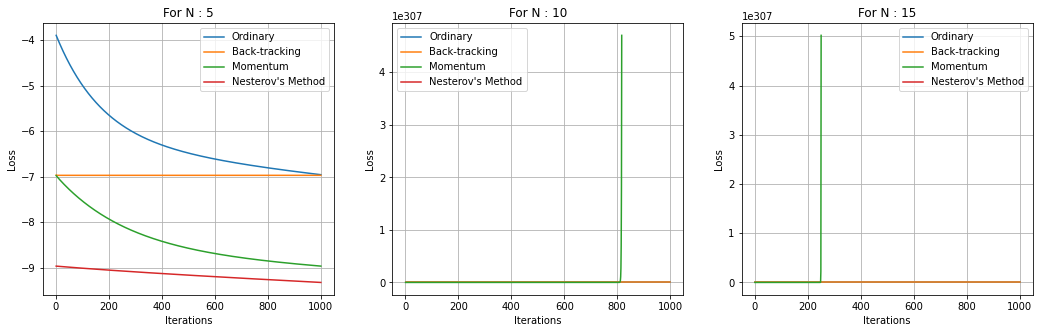

In [ ]:
plt.figure(figsize=(24, 5))
Ns = [5, 10, 15]
iters = np.arange(1, 1001)
for i,N in enumerate(Ns):
  A = np.array([[1/(1/i+1/j) for j in range(1,N+1)] for i in range(1,N+1)])
  b = np.arange(1,N+1).reshape(-1,1)

  x_initial = np.random.uniform(0, 1, (N, 1))

  x2_1, loss2_1 = problem2_1(A, x_initial, b)
  x2_2, loss2_2 = problem2_2(A, x_initial, b)
  x2_3, loss2_3 = problem2_3(A, x_initial, b)
  x2_4, loss2_4 = problem2_4(A, x_initial, b)

  plt.subplot(1, 4, i+1)
  plt.plot(iters, loss2_1, label="Ordinary")
  plt.plot(iters, loss2_2, label="Back-tracking")
  plt.plot(iters, loss2_3, label="Momentum")
  plt.plot(iters, loss2_4, label="Nesterov's Method")
  plt.grid()
  plt.xlabel('Iterations')
  plt.ylabel('Loss')
  plt.legend()
  plt.title('For N : '+str(N))
  #print("\n\nFor size", N, "\n1:\n", x2_1, "\n2:\n", x2_2, "\n3:\n", x2_3)

plt.show()

-I'm receiving some nan values during the calculation of the corresponding loss and in the momentum step. 

-My guess is that this is causing the weird behaviour in the graph above.

# **Problem 3**

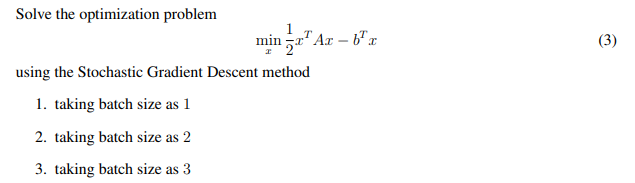

In [ ]:
def problem3(A, x, b, batch_size, N, max_iter = 1000, learning_rate = .01):
  loss = []
  for _ in range(max_iter):
    rand_nums = random.sample(range(1, N), batch_size)
    derivative = lossDerivative(A, x, b)
    for num in rand_nums:
      x[num] -= learning_rate * derivative[num]
    loss.append(lossFunc(A, x, b)[0,0])
  return (x, loss)

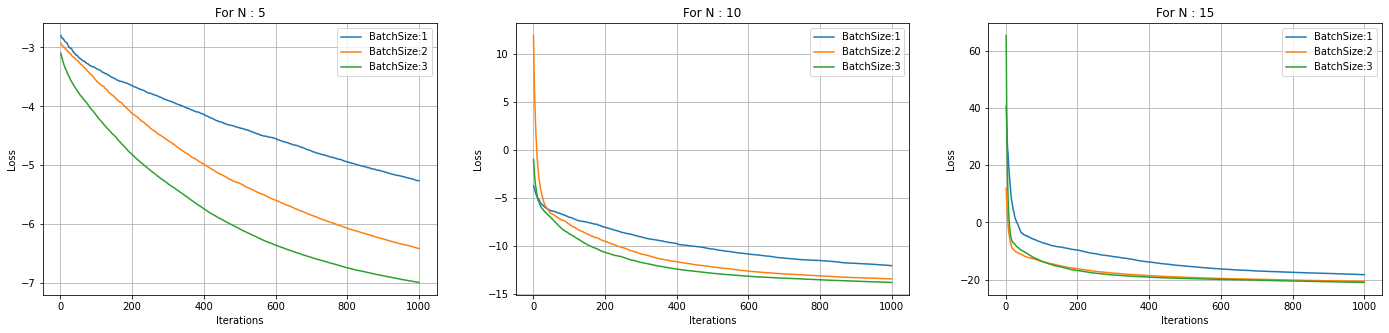

In [ ]:
plt.figure(figsize=(24, 5))
batch_sizes = [1, 2, 3]
Ns = [5, 10, 15]
iters = np.arange(1, 1001)
for i,N in enumerate(Ns):
  plt.subplot(1, 3, i+1)
  for batch_size in batch_sizes:
    A = np.array([[1/(1/i+1/j) for j in range(1,N+1)] for i in range(1,N+1)])
    b = np.arange(1,N+1).reshape(-1,1)

    x_initial = np.random.uniform(0, 1, (N, 1))
    
    x, loss3 = problem3(A, x_initial, b, batch_size, N)
    plt.plot(iters, loss3, label="BatchSize:"+str(batch_size))
  plt.grid()
  plt.xlabel('Iterations')
  plt.ylabel('Loss')
  plt.legend()
  plt.title('For N : '+str(N))

plt.show()